In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import timeit

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 2

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)               

In [6]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 9s 155us/step - loss: 0.3240 - accuracy: 0.8975 - val_loss: 0.0940 - val_accuracy: 0.9698
Epoch 2/2
60000/60000 [==============================] - 8s 141us/step - loss: 0.2883 - accuracy: 0.9096 - val_loss: 0.0803 - val_accuracy: 0.9747


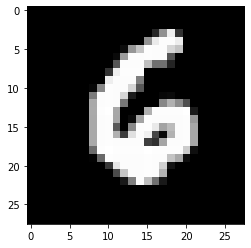

In [5]:
import pylab as plt

plt.imshow(x_test[130:131].reshape(28,28),cmap='gray')
plt.show()

In [6]:
import numpy as np
prediction = model.predict(x_test[130:131])
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])


Prediction Score:
 [0.11495801 0.10586023 0.08930805 0.11774953 0.11181092 0.10724964
 0.06807563 0.10167866 0.08692681 0.09638242]

Thresholded Score:
 [0 0 0 0 0 0 0 0 0 0]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [7]:
model = MobileNet(input_shape=None, alpha=0.25, depth_multiplier=1, dropout=1e-3, 
                                 include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

model.summary()

Model: "mobilenet_0.25_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 8)       216       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 8)       32        
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 8)       0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 8)       72        
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 8)

In [8]:
# Write the image name below

img_path = 'C:/Accuracy.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:\n', decode_predictions(preds))

Predicted:
 [[('n04238763', 'slide_rule', 0.16747911), ('n04118776', 'rule', 0.094237275), ('n06359193', 'web_site', 0.08934647), ('n03291819', 'envelope', 0.08290967), ('n07565083', 'menu', 0.045008305)]]


In [9]:
features = model.predict(x)
print('\nFeature Shape:\n',features.shape)
print('\nFeatures:\n',features)


Feature Shape:
 (1, 1000)

Features:
 [[6.39265139e-08 3.00671061e-04 9.20843377e-07 3.52909638e-07
  1.13535066e-06 7.99440841e-07 5.50967449e-08 2.96489873e-07
  4.90671006e-08 4.05123359e-07 7.98039945e-09 8.26358146e-08
  5.19447610e-07 1.49442538e-08 3.70590598e-08 1.63414109e-06
  6.38625295e-08 2.90876017e-08 7.95098885e-08 2.50605918e-08
  4.80904117e-09 1.33857839e-07 5.00358647e-06 2.16308862e-07
  1.46179923e-06 1.98795025e-08 5.08573203e-06 5.63040434e-04
  2.95293688e-07 2.67502605e-06 9.83652049e-10 8.62523635e-08
  1.34005687e-08 1.42248915e-08 1.84497129e-08 1.98258636e-08
  6.96427023e-08 1.06341362e-08 1.39079532e-06 3.88140307e-07
  1.79501058e-05 1.94877293e-06 9.22663457e-06 4.67660684e-08
  6.46344574e-07 6.01652417e-08 5.98519773e-06 1.03974152e-07
  4.48084414e-09 7.24979031e-07 2.38661437e-06 1.35397094e-09
  4.79863729e-07 1.74621647e-07 4.34177405e-09 1.53913177e-07
  1.21456294e-08 2.69236411e-09 7.86071865e-08 1.05032356e-07
  1.99420583e-07 4.37616077e-09

In [10]:
pip install tf-slim

Note: you may need to restart the kernel to use updated packages.


In [11]:
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import tf_slim as slim
import math

In [12]:
import tensorflow_datasets as tfds
mnist = tfds.load(name='mnist')

In [13]:
import tensorflow.keras.datasets.mnist

In [14]:
import tensorflow as tf
MNIST_data = tfds.load(name = "mnist")
train, test = MNIST_data['train'] , MNIST_data['test']

In [15]:
import keras
fashion_mnist = keras.datasets.fashion_mnist

In [16]:
mnist = tensorflow.keras.datasets.mnist